# **Lab Assignment-2**

### **Name:** Kommana Sriram  
### **Registration Number:** 23BAI1156





# Comparative Study of Loss Functions in Binary Classification

## Model Configuration
- Input Layer: 2 neurons  
- Hidden Layer 1: Dense(16) + ReLU  
- Hidden Layer 2: Dense(16) + ReLU  
- Output Layer: Dense(1) + Sigmoid  
- Optimizer: Adam  
- Epochs: 20 (Exercise 1), 50 (Exercise 2)

## Dataset
Iris dataset (binary classification: Setosa vs Versicolor)

---

## Exercise 1
Compare Binary Cross-Entropy, Mean Squared Error, and Hinge Loss.

---

## Exercise 2
Study the effect of learning rate on different loss functions.


In [19]:
# What this cell does:
# Imports all required libraries for the experiment including TensorFlow (Keras),
# NumPy, Scikit-learn utilities, and Matplotlib for plotting.
#
# Output (op) of this cell:
# No visible output. All required libraries are successfully loaded.
# ------------------------------------------------------------

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
# What this cell does:
# Loads the Iris dataset, selects only two classes for binary classification,
# and extracts the first two features for visualization and training.
#
# Output (op) of this cell:
# Feature matrix X and label vector y are prepared for binary classification.
# ------------------------------------------------------------

iris = load_iris()
X = iris.data
y = iris.target

mask = y < 2
X = X[mask]
y = y[mask]

X = X[:, :2]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (80, 2)
Testing samples: (20, 2)


In [13]:
# What this cell does:
# Defines a function to build and compile a neural network model with
# two hidden layers (16 neurons each) and one output neuron.
#
# Output (op) of this cell:
# A compiled Keras model object is returned when the function is called.
# ------------------------------------------------------------

def build_model(loss_fn, lr):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(2,)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss=loss_fn,
        metrics=['accuracy']
    )
    return model


In [14]:
# What this cell does:
# Defines a utility function to determine the epoch at which the
# training loss starts converging based on a threshold.
#
# Output (op) of this cell:
# Returns the convergence epoch number or 'Not converged'.
# ------------------------------------------------------------

def find_convergence_epoch(losses, threshold=0.001, patience=5):
    for i in range(len(losses) - patience):
        diffs = [abs(losses[i+j] - losses[i+j+1]) for j in range(patience)]
        if all(diff < threshold for diff in diffs):
            return i + 1
    return "Not converged"

## Exercise 1: Comparative Study of Loss Functions

In [15]:
# What this cell does:
# Defines different loss functions and trains the neural network
# separately using each loss function to compare performance.
#
# Output (op) of this cell:
# Prints training progress and stores loss and accuracy metrics.
# ------------------------------------------------------------

loss_functions = {
    "Binary Cross-Entropy": "binary_crossentropy",
    "Mean Squared Error": "mse",
    "Hinge Loss": "hinge"
}

results_ex1 = {}

for name, loss_fn in loss_functions.items():
    print(f"\nTraining using {name}")

    model = build_model(loss_fn, lr=0.001)

    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=16,
        verbose=0
    )

    losses = history.history['loss']

    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    convergence_epoch = find_convergence_epoch(losses)

    results_ex1[name] = {
        "Initial Loss": losses[0],
        "Final Train Accuracy": train_acc,
        "Final Test Accuracy": test_acc,
        "Convergence Epoch": convergence_epoch,
        "Loss Curve": losses
    }


Training using Binary Cross-Entropy


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training using Mean Squared Error

Training using Hinge Loss


## Exercise 1 Results

In [16]:
# What this cell does:
# Displays a comparative summary of training results for each loss function
# including accuracy, convergence epoch, and loss curve nature.
#
# Output (op) of this cell:
# Printed performance metrics for each loss function.
# ------------------------------------------------------------

for name, res in results_ex1.items():
    print(f"\n{name}")
    print(f"Initial Loss (Epoch 1): {res['Initial Loss']:.4f}")
    print(f"Final Training Accuracy: {res['Final Train Accuracy']:.4f}")
    print(f"Final Test Accuracy: {res['Final Test Accuracy']:.4f}")
    print(f"Convergence Begins At Epoch: {res['Convergence Epoch']}")

    losses = res["Loss Curve"]
    nature = "Smooth" if np.std(np.diff(losses)) < 0.01 else "Oscillatory"
    print(f"Nature of Loss Curve: {nature}")


Binary Cross-Entropy
Initial Loss (Epoch 1): 0.6988
Final Training Accuracy: 0.9125
Final Test Accuracy: 1.0000
Convergence Begins At Epoch: Not converged
Nature of Loss Curve: Smooth

Mean Squared Error
Initial Loss (Epoch 1): 0.2025
Final Training Accuracy: 0.9875
Final Test Accuracy: 1.0000
Convergence Begins At Epoch: Not converged
Nature of Loss Curve: Smooth

Hinge Loss
Initial Loss (Epoch 1): 0.9349
Final Training Accuracy: 0.9875
Final Test Accuracy: 1.0000
Convergence Begins At Epoch: Not converged
Nature of Loss Curve: Smooth


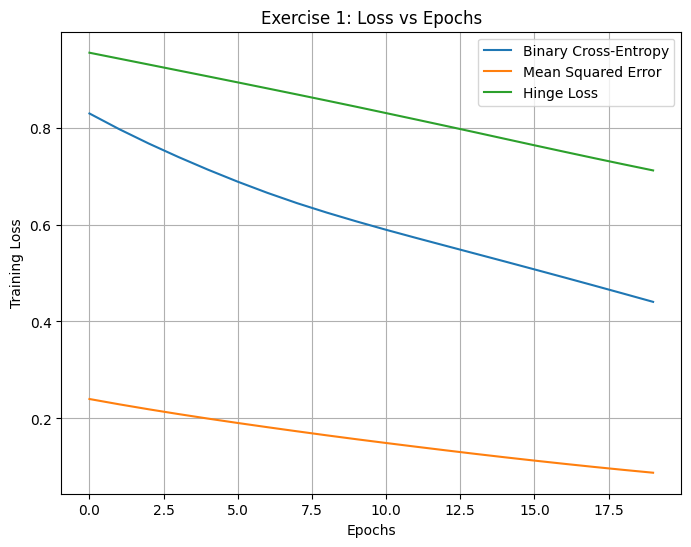

In [20]:
# What this cell does:
# Trains models using different loss functions and plots their
# training loss curves for visual comparison.
#
# Output (op) of this cell:
# Line plot showing loss vs epochs for each loss function.
# ------------------------------------------------------------

plt.figure(figsize=(8,6))

for name, loss_fn in loss_functions.items():
    model = build_model(loss_fn, lr=0.001)
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=16,
        verbose=0
    )
    plt.plot(history.history['loss'], label=name)

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Exercise 1: Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

## Exercise 2: Loss Function vs Learning Rate Sensitivity

In [17]:
# What this cell does:
# Studies the effect of different learning rates on model performance
# for each loss function.
#
# Output (op) of this cell:
# Training results are printed and stored for analysis.
# ------------------------------------------------------------

learning_rates = [0.0005, 0.01]
results_ex2 = {}

for loss_name, loss_fn in loss_functions.items():
    for lr in learning_rates:
        key = f"{loss_name} | LR={lr}"
        print(f"\nTraining {key}")

        model = build_model(loss_fn, lr)

        history = model.fit(
            X_train, y_train,
            epochs=50,
            batch_size=16,
            verbose=0
        )

        losses = history.history['loss']
        _, acc = model.evaluate(X_test, y_test, verbose=0)

        if np.isnan(losses[-1]) or losses[-1] > losses[0] * 1.5:
            behavior = "Diverging"
        elif np.std(losses[-10:]) > 0.01:
            behavior = "Oscillating"
        else:
            behavior = "Stable"

        results_ex2[key] = {
            "Initial Loss": losses[0],
            "Final Accuracy": acc,
            "Training Behavior": behavior
        }



Training Binary Cross-Entropy | LR=0.0005

Training Binary Cross-Entropy | LR=0.01

Training Mean Squared Error | LR=0.0005

Training Mean Squared Error | LR=0.01

Training Hinge Loss | LR=0.0005

Training Hinge Loss | LR=0.01


## Exercise 2 Results

In [18]:
# What this cell does:
# Prints a summarized comparison of learning rate effects
# on training accuracy and behavior.
#
# Output (op) of this cell:
# Printed accuracy and training behavior for each configuration.
# ------------------------------------------------------------

for key, res in results_ex2.items():
    print(f"\n{key}")
    print(f"Initial Loss: {res['Initial Loss']:.4f}")
    print(f"Final Accuracy: {res['Final Accuracy']:.4f}")
    print(f"Training Behavior: {res['Training Behavior']}")


Binary Cross-Entropy | LR=0.0005
Initial Loss: 0.7410
Final Accuracy: 1.0000
Training Behavior: Oscillating

Binary Cross-Entropy | LR=0.01
Initial Loss: 0.5157
Final Accuracy: 1.0000
Training Behavior: Stable

Mean Squared Error | LR=0.0005
Initial Loss: 0.2477
Final Accuracy: 1.0000
Training Behavior: Stable

Mean Squared Error | LR=0.01
Initial Loss: 0.1961
Final Accuracy: 1.0000
Training Behavior: Stable

Hinge Loss | LR=0.0005
Initial Loss: 0.9627
Final Accuracy: 1.0000
Training Behavior: Oscillating

Hinge Loss | LR=0.01
Initial Loss: 0.9462
Final Accuracy: 1.0000
Training Behavior: Stable


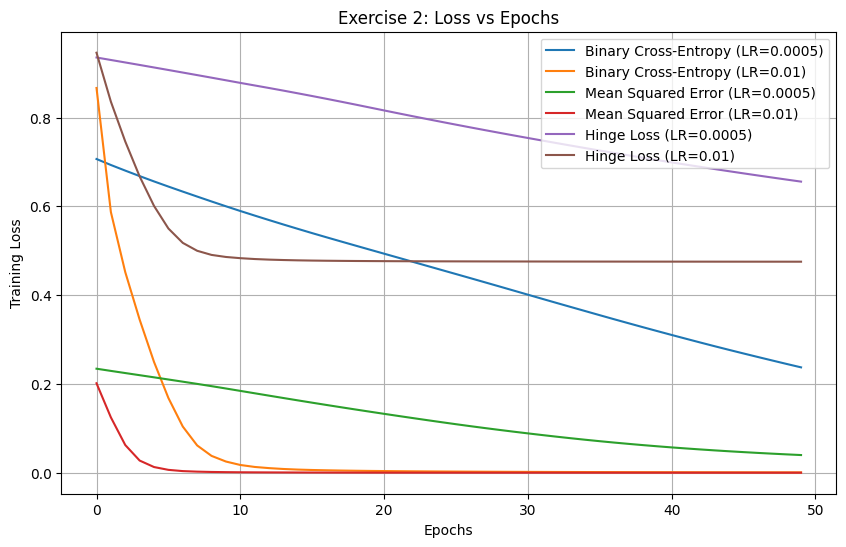

In [21]:
# What this cell does:
# Trains models for extended epochs and plots detailed
# loss curves to visualize stability and convergence behavior.
#
# Output (op) of this cell:
# Detailed loss vs epoch plots for different learning rates.
# ------------------------------------------------------------

plt.figure(figsize=(10,6))

for loss_name, loss_fn in loss_functions.items():
    for lr in [0.0005, 0.01]:
        model = build_model(loss_fn, lr)
        history = model.fit(
            X_train, y_train,
            epochs=50,
            batch_size=16,
            verbose=0
        )
        plt.plot(
            history.history['loss'],
            label=f"{loss_name} (LR={lr})"
        )

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Exercise 2: Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()